# Task  2 - To Explore Supervised Machine learning(Regression)
### Supervised Machine Learning 
##### In this regression task we will predict the percentage of  marks that a student is expected to score based upon the  number of hours they studied. This is a simple linear  regression task as it involves just two variables.


###  Import required library


In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Get the dataset


In [29]:
student_score=pd.read_csv("student_scores.csv")
student_score

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


### View only first 5 rows


In [30]:
student_score.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


### Get the number of rows and columns



In [22]:
student_score.shape

(25, 2)

### Get the information of data


In [31]:
student_score.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### Checking for null value

In [32]:
student_score.isna().sum()

Hours     0
Scores    0
dtype: int64

### Plotting the data

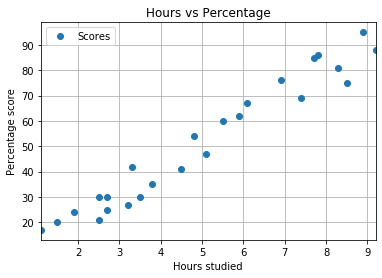

In [37]:

student_score.plot(x='Hours',y='Scores',style='o')
plt.title('Hours vs Percentage')
plt.xlabel('Hours studied')
plt.ylabel('Percentage score')
plt.grid()
plt.show()

### Preparing the data


#### Now we can divide the data into"attributes" and "labels". Attributes(here HOURS STUDIED) are " independent variables" while Labels(here PERCENTAGE OF MARKS) are  "dependent variables" whose value is to be predicted.

In [41]:
#Extracting the 1st column(that is hours)
X=student_score.iloc[:,:-1].values
#Extracting the 2nd column(that is marks)
y=student_score.iloc[:,1].values

In [42]:
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [43]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

### Split the data into train and test set using Scikit-learn

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Training the algorithm

In [46]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### To retrieve the intercept

In [47]:
#We know that y=mx+c which is the line equation.In this we cant't change x and y values,since it is fixed,here we predicting intercept(c) and slope(m)
print(regressor.intercept_)

2.018160041434683


### To retrieve the slope

In [48]:
print(regressor.coef_)

[9.91065648]


### The above result shows that, if a student studies one hour more than they previously studied for an exam, they can expect to achieve an increase of 9.91% in the score achieved by the student

### Plotting regression line

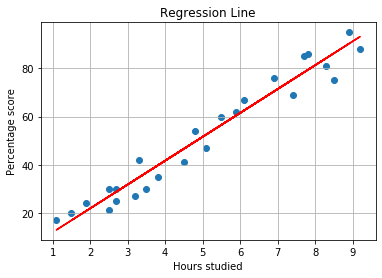

In [50]:
#y=mx+c
line=regressor.coef_*x+regressor.intercept_

plt.scatter(X,y)
plt.plot(X,line,color='red')
plt.title('Regression Line')
plt.xlabel('Hours studied')
plt.ylabel('Percentage score')
plt.grid()
plt.show()

### Making predictions

In [51]:
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


### Evaluating algorithm

In [61]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.5987693072174
Root Mean Squared Error: 4.6474476121003665


### Predicting score

In [62]:
predicted_score = regressor.predict([[9.25]])
print("The score of the student is :", predicted_score)


The score of the student is : [93.69173249]


In [63]:
predicted_score = regressor.predict([[5.5]])
print("The score of the student is :", predicted_score)

The score of the student is : [56.52677068]
